## Garbage Classification using CNN Model

In [17]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
# importing necessary libraries
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")   


In [2]:
train_path = "multiclass dataset/Multi class garbage classification/train"
test_path = "multiclass dataset/Multi class garbage classification/test"

In [6]:
%pip install tensorflow

# importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob
 


Note: you may need to restart the kernel to use updated packages.


In [13]:
# visualizing the data
from cv2 import COLOR_BGR2RGB, cvtColor
x_data = []
y_data = []
for category in glob(train_path + '/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cvtColor(img_array, COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
dataset = pd.DataFrame({'image' : x_data, 'label': y_data})

100%|██████████| 141/141 [00:00<00:00, 543.14it/s]


In [14]:
len(x_data), len(y_data)

(2466, 2466)

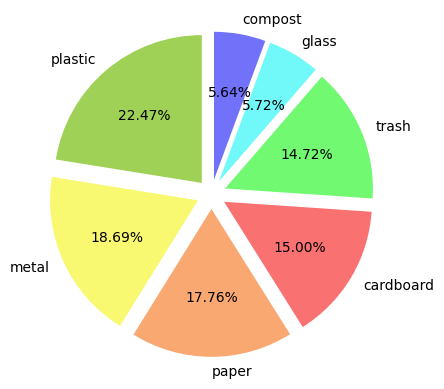

In [16]:
colors = ['#a0d157', '#f9f871', '#f9a871', '#f97171', '#71f971', '#71f9f9', '#7171f9', '#f971f9', '#f971f9', '#f971f9']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
plt.pie(dataset.label.value_counts(), labels=['plastic', 'metal', 'paper', 'cardboard', 'trash', 'glass', 'compost'], colors=colors, autopct='%0.2f%%', startangle=90, explode=explode)
plt.show()

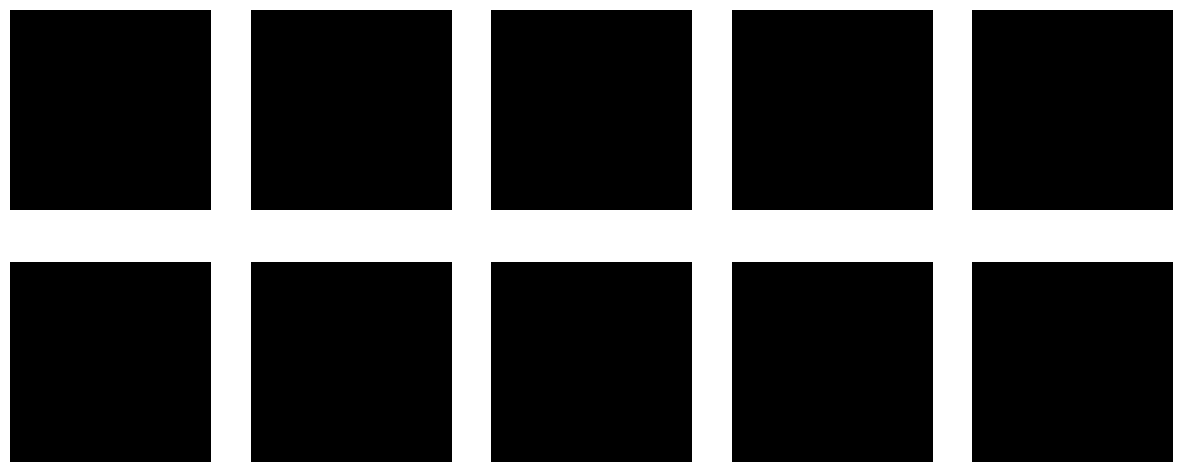

In [20]:
# Resize images to reduce memory usage
x_data_resized = [cv2.resize(img, (128, 128)) for img in x_data]

# Normalize image data
x_data = np.array(x_data_resized, dtype=np.float32) / 255.0
y_data = np.array(y_data)

# Encode labels
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

label_encoder = LabelEncoder()
y_data_encoded = label_encoder.fit_transform(y_data)
y_data_one_hot = to_categorical(y_data_encoded)

# Create dataset DataFrame
dataset = pd.DataFrame({'image' : list(x_data), 'label': y_data})

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Visualize some augmented images
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
for i in range(10):
    augmented_image = datagen.random_transform(x_data[i])
    ax[i//5, i%5].imshow(augmented_image)
    ax[i//5, i%5].axis('off')
plt.show()